In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install HanTa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 40.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
read_df = pd.read_parquet('twitter_data.parquet')
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
0,2021-06-20T21:33:30.000Z,1406726930888540160,1406726930888540160,2981738470,RT @davidlohner: #IchbinHanna und schreibe auc...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406714909258362...",['IchbinHanna'],retweet,de
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
2,2021-06-20T20:50:42.000Z,1406716159064485895,1406716159064485895,2981738470,RT @DrKEichhorn: Wieder ein Artikel ohne echte...,16,0,0,0,"[{'type': 'retweeted', 'id': '1406697315159752...",[],retweet,de
3,2021-06-20T17:56:03.000Z,1406672208056012807,1406672208056012807,2981738470,RT @chrismeyer2203: So sieht es aus ⬇️ oder an...,7,0,0,0,"[{'type': 'retweeted', 'id': '1406175728190865...",[],retweet,de
4,2021-06-20T17:53:00.000Z,1406671439328055301,1406671439328055301,2981738470,RT @steffen_siegel: Modelle einer Universitäts...,17,0,0,0,"[{'type': 'retweeted', 'id': '1406666454368493...",[],retweet,de


In [4]:
read_df = read_df.drop_duplicates(subset=['tweet_id'])
read_df.shape

(181552, 13)

In [5]:
read_df['tweet_language'].value_counts()

de         159811
en          18586
sv           1296
nl            345
fr            314
tl            195
cy            181
it            166
id            159
unknown       120
es             51
ja             49
fi             33
no             28
pl             28
sw             24
pt             22
af             19
et             17
ca             16
so             14
da             14
tr             11
ro             11
cs              7
ar              7
sl              6
hr              5
sk              4
vi              3
hi              2
fa              2
hu              2
th              1
sq              1
ru              1
lv              1
Name: tweet_language, dtype: int64

In [6]:
read_df = read_df.loc[read_df['tweet_type'] != 'retweet']
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,☝️⬇️ #IchbinHanna #PeerReview https://t.co/PFN...,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread ⬇️ about the cruel #precarity in German...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread ⬇️ zu #Machtmissbrauch in der...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [7]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

read_df.text = read_df.text.apply(remove_emojis)
read_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalist:innen über #IchbinHa...,9,1,62,4,[],['IchbinHanna'],original,de
5,2021-06-20T16:17:25.000Z,1406647386542325764,1406647386542325764,2981738470,#IchbinHanna #PeerReview https://t.co/PFNrovEOAS,0,0,1,0,"[{'type': 'quoted', 'id': '1406620276822061057'}]","['IchbinHanna', 'PeerReview']",original,nl
11,2021-06-18T13:10:36.000Z,1405875593711964166,1405875593711964166,1132055796571877376,Thread about the cruel #precarity in German #...,5,0,19,0,"[{'type': 'quoted', 'id': '1405846267759054851'}]","['precarity', 'academia', 'IchbinHanna', 'Acad...",original,en
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,"Liebe @unidue und Forsa - schön, dass ihr euch...",0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu #Machtmissbrauch in der #...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de


In [8]:
def remove_mentions_and_tags(text): #Removing mentions and hashtags and url
    text = re.sub(r'@\S*', '', text)
    text = re.sub(r'http\S+', '', text)
    return re.sub(r'#\S*', '', text)

read_df.text = read_df.text.apply(remove_mentions_and_tags)

In [9]:
read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations

C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\2773504966.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace(r'[^\w\s]+', '') #remove punctuations


In [10]:
read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number

C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\2955464902.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  read_df['text'] = read_df['text'].str.replace('\d+', '') #removes number


In [11]:
###German 

In [11]:
de_df = read_df[read_df.tweet_language == 'de']
de_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de


In [12]:
#getting nouns and adjectives
import nltk
nltk.download('punkt')
from HanTa import HanoverTagger as ht

de_tagger = ht.HanoverTagger('morphmodel_ger.pgz')

def de_noun(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in de_tagger.tag_sent(words,taglevel= 1) if pos == 'NN']
  return tokens

def de_adj(text):
  words = nltk.word_tokenize(text)
  tokens=[word for (word,x,pos) in de_tagger.tag_sent(words,taglevel= 1) if pos == 'ADJ']
  return tokens

de_df['de_noun'] = de_df.text.apply(de_noun)
de_df['de_adj'] = de_df.text.apply(de_adj)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\3135417134.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['de_noun'] = de_df.text.apply(de_noun)
C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\3135417134.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['de_adj'] = de_df.text.apply(de_adj)


In [13]:
de_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,de_noun,de_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,"[Wirtschaftsjounalistinnen, amp, Geschichten, ...",[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,"[Liebe, Forsa, Umfrage, Fragen, Entfristung, P...",[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,"[Thread, Arbeitsverträge]",[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,[],[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,"[Punkt, Verwertungslogik, Bekenntnisse, Aussch...",[]


In [31]:
de_df.de_noun.unique

<bound method Series.unique of 1         wirtschaftsjounalistinnen geschichten nachwuch...
16        liebe forsa umfrage fragen entfristung planbar...
19                                   thread arbeitsverträge
21                                                         
22        punkt verwertungslogik bekenntnisse ausschreib...
                                ...                        
308278                                      system freiheit
308279                                         urlaub worte
308311                                                     
308326                gesetz stärkung berliner dauerstellen
308332    hochschulverband eckpunkte stakeholderprozess ...
Name: de_noun, Length: 42747, dtype: object>

In [15]:
# x = de_df.noun_adj[1]
# for i in range(len(x)):
#   print (x[i])
def to_lowercase(text):
  token = []
  for i in range(len(text)):
    val = text[i].lower()
    token.append(val)
  return token

de_df.de_noun = de_df.de_noun.apply(to_lowercase)

de_df.head()

C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\2321224622.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df.de_noun = de_df.de_noun.apply(to_lowercase)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,de_noun,de_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,"[wirtschaftsjounalistinnen, amp, geschichten, ...",[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,"[liebe, forsa, umfrage, fragen, entfristung, p...",[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,"[thread, arbeitsverträge]",[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,[],[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,"[punkt, verwertungslogik, bekenntnisse, aussch...",[]


In [16]:
de_df.de_adj = de_df.de_adj.apply(to_lowercase)

C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\2482897472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df.de_adj = de_df.de_adj.apply(to_lowercase)


In [17]:
nltk.download('stopwords')
from nltk.corpus import stopwords

german_stop_words = stopwords.words('german')
german_stop_words.append('amp')

def stop_word_de_removal(x):
    return ' '.join([w for w in x if not w in german_stop_words])

de_df.de_noun = de_df.de_noun.apply(stop_word_de_removal)
de_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moinam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\3965455665.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df.de_noun = de_df.de_noun.apply(stop_word_de_removal)


,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,de_noun,de_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,wirtschaftsjounalistinnen geschichten nachwuch...,[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,liebe forsa umfrage fragen entfristung planbar...,[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,thread arbeitsverträge,[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,,[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,punkt verwertungslogik bekenntnisse ausschreib...,[]


In [18]:
de_df.de_adj = de_df.de_adj.apply(stop_word_de_removal)

C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\720511117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df.de_adj = de_df.de_adj.apply(stop_word_de_removal)


In [20]:
!pip install germalemma==0.1.3

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 2.3/2.3 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 22.1/22.1 MB 4.2 MB/s eta 0:00:00


In [19]:
#lemmas
from germalemma import GermaLemma
lemmatizer = GermaLemma()

def lemmatize_noun(x):
  arr = []
  token = x.split()
  for i in range(len(token)):
    lemma_noun = lemmatizer.find_lemma(token[i],'N')
    arr.append(lemma_noun)
  return arr

def lemmatize_adj(x):
  arr = []
  token = x.split()
  for i in range(len(token)):
    lemma_noun = lemmatizer.find_lemma(token[i],'ADJ')
    arr.append(lemma_noun)
  return arr

de_df['lemma_noun'] = de_df.de_noun.apply(lemmatize_noun)
de_df['lemma_adj'] = de_df.de_adj.apply(lemmatize_adj)

C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\1744800198.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['lemma_noun'] = de_df.de_noun.apply(lemmatize_noun)
C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\1744800198.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['lemma_adj'] = de_df.de_adj.apply(lemmatize_adj)


In [20]:
de_df.head()

,timestamp,tweet_id,conversation_id,author_id,text,retweet_count,reply_count,like_count,quote_count,referenced_tweets,hashtags,tweet_type,tweet_language,de_noun,de_adj,lemma_noun,lemma_adj
1,2021-06-20T21:29:24.000Z,1406725899744157698,1406725899744157698,2981738470,Wenn Wirtschaftsjounalistinnen über schreiben...,9,1,62,4,[],['IchbinHanna'],original,de,wirtschaftsjounalistinnen geschichten nachwuch...,,"[Wirtschaftsjounalistinnen, Geschicht, Nachwuc...",[]
16,2021-06-18T10:21:31.000Z,1405833045224087555,1405833045224087555,242424959,Liebe und Forsa schön dass ihr euch per Umfr...,0,1,2,0,[],"['Mittelbau', 'IchBinHanna']",original,de,liebe forsa umfrage fragen entfristung planbar...,,"[Liebe, Forsa, Umfrage, Fragen, Entfristung, P...",[]
19,2021-06-18T08:35:29.000Z,1405806358335832065,1405806358335832065,1132055796571877376,Wichtiger Thread zu in der der durch die A...,2,0,13,0,"[{'type': 'quoted', 'id': '1405494574533984264'}]","['Machtmissbrauch', 'Wissenschaft', 'prekär', ...",original,de,thread arbeitsverträge,,"[Thread, Arbeitsvertrag]",[]
21,2021-06-18T07:52:36.000Z,1405795569273131011,1405795569273131011,1132055796571877376,Wir können ja mal einen für machen Wer macht...,4,0,16,0,"[{'type': 'quoted', 'id': '1405617868734148610'}]","['FollowFriday', 'IchbinHanna', 'WissZeitVG', ...",original,de,,,[],[]
22,2021-06-18T02:42:56.000Z,1405717636999155717,1405717636999155717,2981738470,Das ist übrigens ein Punkt der mir bei einfac...,1,0,6,0,"[{'type': 'quoted', 'id': '1405460325437149186'}]",['IchbinHanna'],original,de,punkt verwertungslogik bekenntnisse ausschreib...,,"[Punkt, Verwertungslogik, Bekenntnis, Ausschre...",[]


In [21]:
dict_docs_de =  de_df.lemma_noun.to_dict()
# print(dict_docs_de)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vects = vect.fit_transform(de_df.de_noun)

newdf1 = pd.DataFrame(vects.todense())
newdf1.columns = vect.get_feature_names()

tdm_de = newdf1.T
tdm_de.columns = ['Doc '+str(i) for i in range(newdf1.shape[0])]
tdm_de['total_count'] = tdm_de.sum(axis=1)

tdm_de = tdm_de.sort_values(by = 'total_count', ascending=False)
print(tdm_de.drop(columns=['total_count']).head())

c:\Users\Moinam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


              Doc 0  Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  \
wissenschaft      0      0      0      0      0      0      1      0      0   
forschung         0      0      0      0      0      0      0      0      0   
jahre             0      0      0      0      0      0      0      0      0   
jahren            0      0      0      0      0      0      0      0      0   
stellen           0      0      0      0      0      0      0      0      0   

              Doc 9  ...  Doc 42737  Doc 42738  Doc 42739  Doc 42740  \
wissenschaft      0  ...          0          0          0          1   
forschung         0  ...          0          0          0          0   
jahre             0  ...          0          0          0          0   
jahren            0  ...          0          0          1          0   
stellen           0  ...          0          0          0          0   

              Doc 42741  Doc 42742  Doc 42743  Doc 42744  Doc 42745  Doc 42746  
wissenschaf

In [23]:
tdm_de

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 42738,Doc 42739,Doc 42740,Doc 42741,Doc 42742,Doc 42743,Doc 42744,Doc 42745,Doc 42746,total_count
wissenschaft,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3560
forschung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1711
jahre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1686
jahren,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1401
stellen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lastenfahrradkäuferin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
betriebszugehörigkeit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
lasern,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
lasergirl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
tdm_de = tdm_de.drop(columns=['total_count'], axis =1)
tdm_de

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,...,Doc 42737,Doc 42738,Doc 42739,Doc 42740,Doc 42741,Doc 42742,Doc 42743,Doc 42744,Doc 42745,Doc 42746
wissenschaft,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
forschung,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jahre,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jahren,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
stellen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lastenfahrradkäuferin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
betriebszugehörigkeit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lasern,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lasergirl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
dtm_de = tdm_de.to_numpy()
print(type(dtm_de))

<class 'numpy.ndarray'>


In [29]:
!pip install lda

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [26]:
import lda

vocab = de_df.de_noun
n_topics = []
log_likelihoods = []
lda_models = []

for i in range(2, 41):
    n_topics.append(i)

for i in n_topics:
    tdm_lda = lda.LDA(n_topics=i, n_iter=1000, random_state=42)
    tdm_lda.fit(dtm_de)
    log_likelihoods.append(tdm_lda.loglikelihoods_[99])
    lda_models.append(tdm_lda)


INFO:lda:n_documents: 29648
INFO:lda:vocab_size: 42747
INFO:lda:n_words: 203156
INFO:lda:n_topics: 2
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -2564537
INFO:lda:<10> log likelihood: -2318759
INFO:lda:<20> log likelihood: -2315354
INFO:lda:<30> log likelihood: -2313321
INFO:lda:<40> log likelihood: -2311861
INFO:lda:<50> log likelihood: -2311068
INFO:lda:<60> log likelihood: -2309928
INFO:lda:<70> log likelihood: -2309179
INFO:lda:<80> log likelihood: -2308665
INFO:lda:<90> log likelihood: -2307908
INFO:lda:<100> log likelihood: -2307763
INFO:lda:<110> log likelihood: -2307448
INFO:lda:<120> log likelihood: -2307188
INFO:lda:<130> log likelihood: -2306587
INFO:lda:<140> log likelihood: -2306140
INFO:lda:<150> log likelihood: -2306032
INFO:lda:<160> log likelihood: -2305628
INFO:lda:<170> log likelihood: -2305545
INFO:lda:<180> log likelihood: -2305182
INFO:lda:<190> log likelihood: -2305053
INFO:lda:<200> log likelihood: -2304773
INFO:lda:<210> log likelihood: -2304557
INFO:lda

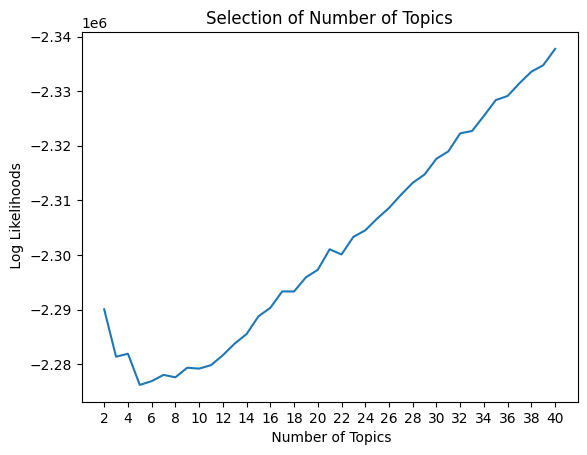

In [27]:
plt.plot(n_topics, log_likelihoods)
plt.xticks(np.arange(min(n_topics), max(n_topics)+1, 2))
plt.gca().invert_yaxis()
plt.title('Selection of Number of Topics')
plt.xlabel(' Number of Topics')
plt.ylabel(' Log Likelihoods')
plt.show()

In [32]:
def generate_tokens(tweet):
  words = []
  for i in range(len(tweet)):
    word = tweet[i]
  # using the if condition because we introduced extra spaces during text cleaning
    if word != '':
      words.append(word)
  return words


#storing the generated tokens in a new column named 'words'
de_df['tokens'] = de_df.lemma_noun.apply(generate_tokens)


C:\Users\Moinam\AppData\Local\Temp\ipykernel_7720\1552928343.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  de_df['tokens'] = de_df.lemma_noun.apply(generate_tokens)


In [33]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


def create_dictionary(words):
  return corpora.Dictionary(words)


def create_document_matrix(tokens, id2word):
  corpus = []
  for text in tokens:
    corpus.append(id2word.doc2bow(text))
  return corpus


#passing the dataframe column having tokens as the argument
de_id2word = create_dictionary(de_df.tokens)

#passing the dataframe column having tokens and dictionary
de_corpus = create_document_matrix(de_df.tokens, de_id2word)


INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary<10738 unique tokens: ['Aktienmarkt', 'Finanzkrise', 'Geschicht', 'Mensch', 'Nachwuchses']...>
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary<16518 unique tokens: ['Aktienmarkt', 'Finanzkrise', 'Geschicht', 'Mensch', 'Nachwuchses']...>
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary<21822 unique tokens: ['Aktienmarkt', 'Finanzkrise', 'Geschicht', 'Mensch', 'Nachwuchses']...>
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary<26449 unique tokens: ['Aktienmarkt', 'Finanzkrise', 'Geschicht', 'Mensch', 'Nachwuchses']...>
INFO:gensim.corpora.dictionary:built Dictionary<27729 unique tokens: ['Aktienmarkt', 'Finanzkrise', 'Geschicht', 'Mensch', 'Nachwuchses']...> from 42747 documents (total 203521 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': "built Dictionary<2

In [34]:
de_lda_model = gensim.models.ldamodel.LdaModel(
    corpus=de_corpus, id2word=de_id2word, num_topics=5, random_state=42)


INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using symmetric eta at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 42747 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/42747
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 42747 documents
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.040*"Wissenschaft" + 0.018*"Forschung" + 0.018*"Wissenschaftlerinnen" + 0.016*"Stelle" + 0.013*"Jahre" + 0.012*"Jahren" + 0.008*"Wissenschaftler" + 0.008*"Verträge" + 0.008*"Uni" + 0.007*"Arbeitsbedingung"
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.019*"Wissenschaft" + 0.013*"Arbeit" + 0.013*"Jahre" + 0.013*"Promotion" + 0.0

In [35]:
import pyLDAvis.gensim_models
import pyLDAvis
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(de_lda_model,
                                     de_corpus,
                                     dictionary=de_lda_model.id2word)
vis


c:\Users\Moinam\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.110661  0.069505       1        1  21.980700
3     -0.077523 -0.189957       2        1  21.786840
1     -0.096587  0.187785       3        1  21.200283
4      0.015708 -0.115332       4        1  18.869442
2      0.269062  0.047999       5        1  16.162734, topic_info=                Term         Freq        Total Category  logprob  loglift
31       Dauerstelle  1791.000000  1791.000000  Default  30.0000  30.0000
153        Forschung  1744.000000  1744.000000  Default  29.0000  29.0000
324            Lehre  1092.000000  1092.000000  Default  28.0000  28.0000
135        Promotion   747.000000   747.000000  Default  27.0000  27.0000
518  Wissenschaftler   548.000000   548.000000  Default  26.0000  26.0000
..               ...          ...          ...      ...      ...      ...
449             Unis   168.553277  1201.169234   Topic5  -5.2738  -0.1413
29      Wissenschaft   202.216469  3063.522273   Topic5  -5.0917  -0.8955
308           Gesetz   118.768152   343.338423   Topic5  -5.6239   0.7609
118            Thema   132.355094   792.286036   Topic5  -5.5156   0.0330
203            Jahre   125.984147  1416.620288   Topic5  -5.5649  -0.5974

[355 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2431      1  0.984452        Abend
1726      2  0.989765  Abschaffung
909       1  0.007416    Abschluss
909       3  0.993684    Abschluss
1467      5  0.990651          Ach
...     ...       ...          ...
181       2  0.985981  Zeitvertrag
269       1  0.009207      Zukunft
269       3  0.985176      Zukunft
269       4  0.003069      Zukunft
4178      1  0.985886            e

[644 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])